#  Сравнение оценки стоимости, произведенный Компанией 1 и компанией 2

Проверка будет осуществлена на 29 транспортных средствах, одновременно оцененными Компанией 1 и компанией 2

In [21]:
pre = '../' # путь до главной директории проекта

%run init.ipynb #подгрузить нужные библиотеки

In [22]:
# сюда таблицы служебные будем кидать, для отчетов
name = pre + "data/interm/auxilary/comparison.xlsx"
writer = ExcelWriter(name)

Файл с оценкой, выполненной "Компанией 1"

In [23]:
# файл исходный, подготовленные данные по оценке, будет использоваться как эталон
df_comp1 = pd.read_pickle(pre+"data/interm/external_pkl/evaluation_company_1.pkl", compression={'method':'zip'})
print(len(df_comp1))
print(df_comp1.columns)

# df_comp1.head(2)

29
Index(['ссылка на задачу', 'Номер задачи', 'Тип ПЛ', 'Состояние', 'vin номер',
       'Марка', 'Модель ', 'Модификация', 'Год выпуска', 'Пробег, км',
       'Стоимость по ДКП', 'Оценка Оценщика',
       'дата подготовки заключения (оценки)'],
      dtype='object')


Файл с оценкой, выполненной "Компанией 2"

In [24]:
# возьмем только те VIN по которым есть эталлонные значения
df_comp2 = pd.read_pickle(pre+"data/interm/external_pkl/evaluation_company_2.pkl", compression={'method':'zip'})
df_comp2 = df_comp2[df_comp2['VIN'].isin(df_comp1['vin номер'].to_list())]

print(len(df_comp2))
print(df_comp2.columns)

# df_comp2.head(2)

29
Index(['VIN', 'Марка', 'Модель', 'Поколение', 'Тип кузова', 'Год выпуска',
       'Тип топлива', 'Объём двигателя, л,', 'Мощность, л.с.', 'Тип КПП',
       'Тип привода', 'Цена', 'В залоге или нет (1 - в залоге, 0 - нет)',
       'Дата последней регистрации', 'Номер владельца последней регистрации',
       'Тип владельца последней регистрации',
       'ИНН владельца последней регистрации', 'Регион последней регистрации',
       'Дата предыдущей регистрации', 'Номер владельца предыдущей регистрации',
       'Тип владельца предыдущей регистрации',
       'ИНН владельца предыдущей регистрации', 'Регион предыдущей регистрации',
       'Дата первой регистрации', 'Номер владельца первой регистрации',
       'Тип владельца первой регистрации', 'ИНН владельца первой регистрации',
       'Регион первой регистрации'],
      dtype='object')


### Сравнение цен Автолизинга и Автостата

Сравнительный анализ оценки стоимости проводился по 29 различным транспортным средствам

распределение по годам выпуска

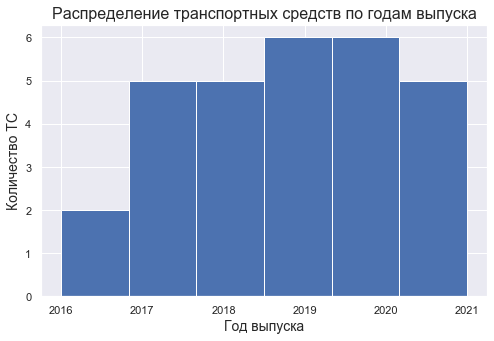

In [25]:
sns.set()

fig = plt.figure(figsize=(8, 5))
plt.hist(df_comp1['Год выпуска'], bins=6);
plt.xlabel("Год выпуска", fontsize = 14)
plt.ylabel('Количество ТС', fontsize = 14)
plt.title('Распределение транспортных средств по годам выпуска', fontsize = 16);
plt.savefig(pre+'data/interm/img/Количество оцененных ТС по годам.png')


In [26]:
df_brends = pd.pivot_table(df_comp1, index='Марка',  values='vin номер', aggfunc='count').reset_index()
df_brends = df_brends.sort_values(by='vin номер', ascending=False).reset_index(drop=True)
# df_brends.head(2)

перечень марок таких транспортных средств

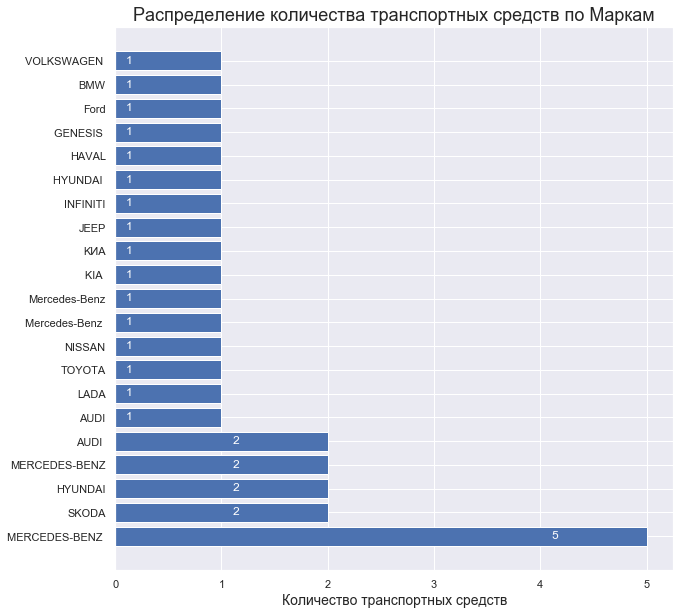

In [27]:
sns.set()

fig = plt.figure(figsize=(10, 10))
plt.barh(df_brends['Марка'], df_brends['vin номер']);
plt.xlabel('Количество транспортных средств', fontsize = 14)
plt.title('Распределение количества транспортных средств по Маркам', fontsize = 18)

# # annotate value labels to each country
for index, row in df_brends.iterrows():
    value = row['vin номер']
    label = format(int(value), ',') # format int with commas
  # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value-0.9, index - 0.10), color='white')
plt.savefig(pre+'data/interm/img/Количество оцененных марок автомобилей.png')
plt.show()

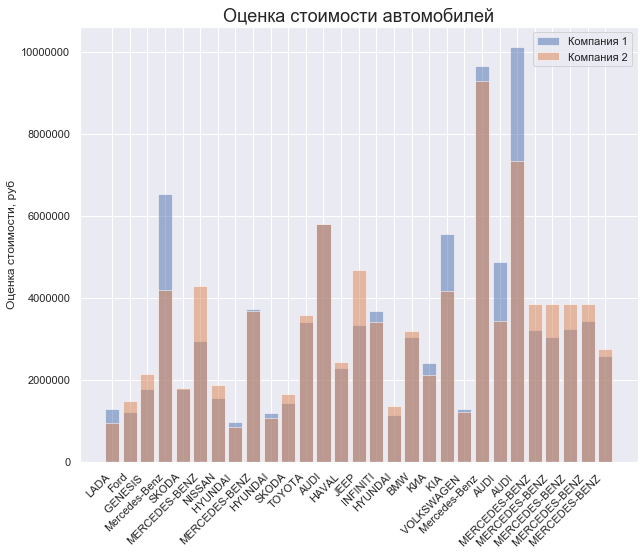

In [28]:
import locale
locale.setlocale(locale.LC_ALL, '')
import matplotlib.ticker
kwargs = dict(alpha=0.3)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
formatter = matplotlib.ticker.FormatStrFormatter("%.f")
ax.yaxis.set_major_formatter(formatter)
ax.bar(df_comp1['vin номер'], df_comp1['Оценка Оценщика'], alpha=0.5)
ax.bar(df_comp2['VIN'], df_comp2['Цена'], alpha=0.5)
ax.legend(['Компания 1', 'Компания 2'])
ax.xaxis.set_ticklabels(df_comp1['Марка'], rotation=45, ha='right');
ax.set_ylabel("Оценка стоимости, руб", fontsize = 12)
ax.set_title('Оценка стоимости автомобилей', fontsize = 18);



Cтоимость транспортных средств, участвующих в сравнении, по оценке Компании 1 варьировалась в диапазоне от 968 000 до 10 100 000 рублей.

статистические данные об оценке стоимости транспортных средств

In [29]:
leasing_StatsW = sm.stats.DescrStatsW(df_comp1['Оценка Оценщика'])
Autostat_StatsW = sm.stats.DescrStatsW(df_comp2['Цена'])

print('Средняя цена оценки автолизинга {:10.2f}'.format(leasing_StatsW.mean))
print('std оценки автолизинга {:10.2f}'.format(leasing_StatsW.std))

print('Средняя цена оценки Автостата   {:10.2f}'.format(Autostat_StatsW.mean))
print('std оценки Автостата {:10.2f}'.format(Autostat_StatsW.std))

Средняя цена оценки автолизинга 3324387.31
std оценки автолизинга 2288479.25
Средняя цена оценки Автостата   3242762.55
std оценки Автостата 1883457.94


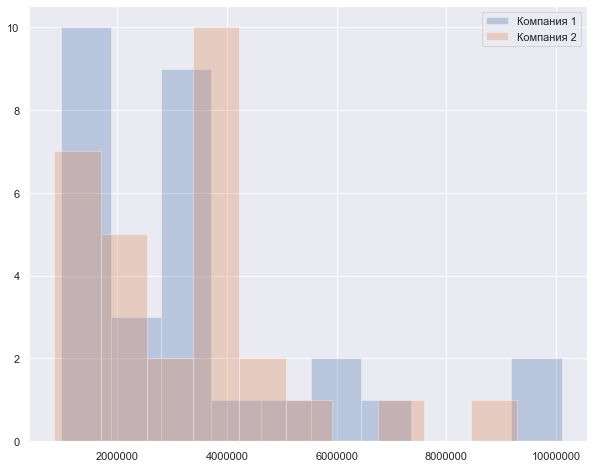

In [30]:
kwargs = dict(alpha=0.3)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
formatter = matplotlib.ticker.FormatStrFormatter("%.f")
ax.xaxis.set_major_formatter(formatter)

ax.hist(df_comp1['Оценка Оценщика'], **kwargs);
ax.hist(df_comp2['Цена'], **kwargs);
ax.legend(['Компания 1', 'Компания 2'])


In [31]:
prices = pd.merge(df_comp1[['vin номер', 'Оценка Оценщика']], df_comp2[['VIN', 'Цена']], how = "inner" , left_on=['vin номер'], right_on=['VIN']) 
print(prices.shape)
# prices.head()

(29, 4)


In [32]:
prices['Diff_Price'] = prices['Оценка Оценщика']- prices['Цена']
prices['Relative_Price'] = (prices['Оценка Оценщика']- prices['Цена'])/prices['Оценка Оценщика']*100
# prices.head(2)


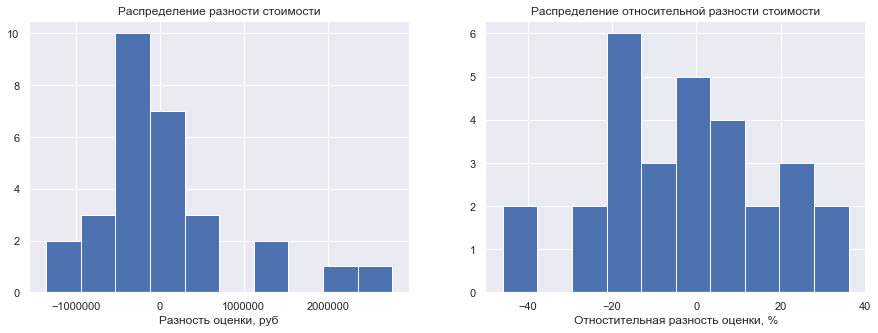

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(prices['Diff_Price'], bins = 10);
ax[0].set_xlabel("Разность оценки, руб", fontsize = 12)
ax[0].set_title('Распределение разности стоимости', fontsize = 12);

ax[1].hist(prices['Relative_Price'], bins = 10);
ax[1].set_xlabel("Отностительная разность оценки, %", fontsize = 12)
ax[1].set_title('Распределение относительной разности стоимости', fontsize = 12);

fig.savefig(pre+'data/interm/img/Распределение разности.png')


In [34]:
relative_price = prices['Relative_Price']
diff_price = prices['Diff_Price']

In [35]:
Diff_StatsW = sm.stats.DescrStatsW(diff_price)

print('Среднее разность оценки {:10.2f}'.format(Diff_StatsW.mean))
print('std разности оценки {:10.2f}'.format(Diff_StatsW.std))

Среднее разность оценки   81624.76
std разности оценки  892199.59


In [36]:
Relative_StatsW = sm.stats.DescrStatsW(relative_price)

print('Средняя относительная разность оценки {:10.2f}'.format(Relative_StatsW.mean))
print('std относительная разности оценки {:10.2f}'.format(Relative_StatsW.std))

Средняя относительная разность оценки      -3.02
std относительная разности оценки      20.21


графики Квантиль-квантиль (Q-Q plot), показывающие, насколько близки распределения абсолютной и относительной разности стоимости с t-distribution со степенями свободы (df) 28

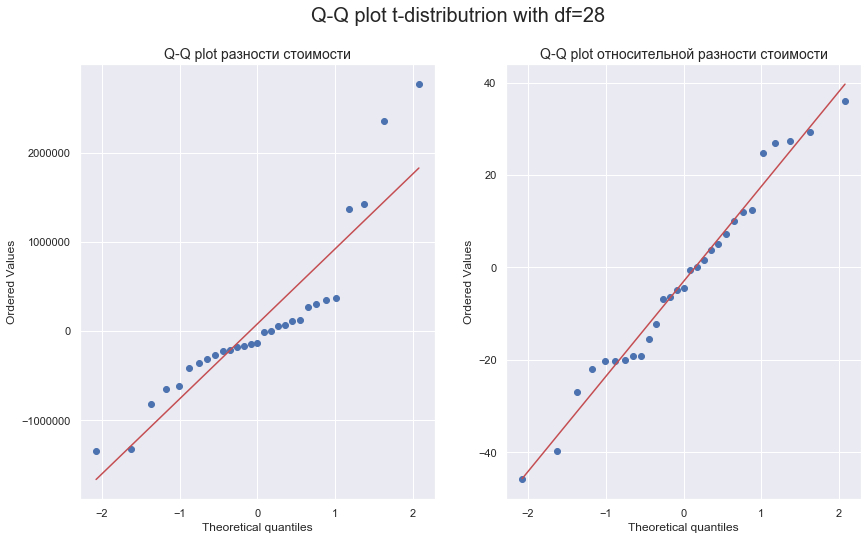

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

stats.probplot(diff_price, dist=stats.t(df=28), plot=ax[0])
ax[0].set_title("Q-Q plot разности стоимости", fontsize = 14)


stats.probplot(relative_price, dist=stats.t(df=28), plot=ax[1])
ax[1].set_title("Q-Q plot относительной разности стоимости", fontsize = 14)

fig.suptitle("Q-Q plot t-distributrion with df=28", fontsize=20)
fig.savefig(pre+'data/interm/img/Q-Q plot.png')

Из графиков видно, что распределение разности оценок стоимости сильно отклоняется от $t$-распределения из-за небольшой тестовой выборки и большого разброса в стоимости транспортных средств. Наблюдается заметная асимметрия справа (right-skewed distribution). 

Распределение относительной разности стоимости заметно ближе к $t$-распределению. Поэтому исследование на различие в оценках стоимости проводился только на относительной разнице.

#### Проверка гипотезы равенства среднего значения оценок Paired tests

Для анализа использовался $t$-test. В качестве нулевой гипотезы было равенство нулю средней относительной разницы в оценках стоимости. В качестве альтернативной гипотезы — средняя относительная разница стоимости, предоставленная Аналитическим агентством «Компания 2» и «Компанией 1» различна. Двусторонний  $t$-тест был проведен с уровнем значимости α=0.1. 

То есть,  

$H0: \overline{Relative} = 0$  
$H1: \overline{Relative} \not= 0$


In [38]:
stats.ttest_1samp(relative_price, popmean = 0)

Ttest_1sampResult(statistic=-0.791531133540786, pvalue=0.4352885382321958)

In [39]:
print(sm.stats.ztest(relative_price))

(-0.791531133540786, 0.428634115702864)


In [40]:
stat, p = stats.ttest_rel(prices['Оценка Оценщика'], prices['Цена'])
print('ttest_rel Statistics=%f, p=%f' % (stat, p))

ttest_rel Statistics=0.484104, p=0.632077


|                                          |         |
| ---------------------------------------- | ------- |
| Средняя относительная разность оценки, % | -3.02   |
| Среднеквадратическое отклонение ($std$), % | 20.21   |
| Значение $t$-статистики                    | -0.7915 |
| $p$-value                                  | 0.4353  |


Рассчитанное значение $p$-value (0.4353) больше установленного уровня значимости $α=0.1$, что не дает достаточно оснований опровергнуть гипотезу равенства нулю средней относительной разницы в оценках стоимости. 